In [29]:
#Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report

In [30]:
#loading dataset
df=pd.read_excel("student_performance_data.xlsx")

#previewing data
df.head()

,Student_ID,Hours_Studied,Attendance_Percentage,Homework_Completion_Rate,Sleep_Hours,Social_Media_Hours,Previous_Grade,Participation_Score,Final_Exam_Score,Pass_Fail
0,S0001,12.8,100.0,91.5,4.9,3.8,78.0,5.1,19.2,0
1,S0002,8.5,84.4,100.0,4.6,2.9,72.6,5.2,18.0,0
2,S0003,10.3,77.9,92.8,5.2,0.9,70.9,2.3,16.6,0
3,S0004,8.6,69.9,82.0,7.2,1.9,93.2,10.0,23.5,1
4,S0005,8.7,67.0,89.2,5.7,2.6,86.8,5.3,20.2,1


Student_ID                  0
Hours_Studied               0
Attendance_Percentage       0
Homework_Completion_Rate    0
Sleep_Hours                 0
Social_Media_Hours          0
Previous_Grade              0
Participation_Score         0
Final_Exam_Score            0
Pass_Fail                   0
dtype: int64
       Hours_Studied  Attendance_Percentage  Homework_Completion_Rate  \
count    1000.000000            1000.000000               1000.000000   
mean       10.277600              84.833300                 89.497800   
std         2.975263               9.145275                  7.505125   
min         1.200000              54.800000                 66.100000   
25%         8.300000              78.500000                 84.200000   
50%        10.200000              85.000000                 89.950000   
75%        12.200000              91.525000                 95.500000   
max        19.600000             100.000000                100.000000   

       Sleep_Hours  Social_Me

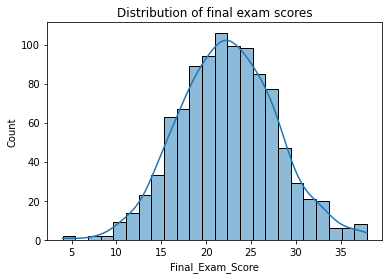

In [31]:
#Exploratory Data Analysis

#checking for nulls 
print(df.isnull().sum())

#Basic stats
print(df.describe())

#Distribution of final exam scores
sns.histplot(df["Final_Exam_Score"], kde=True)
plt.title("Distribution of final exam scores")
plt.show()

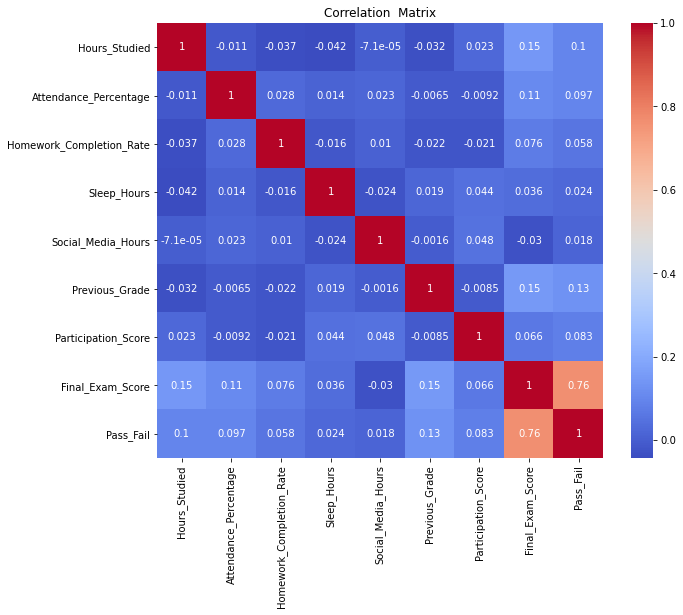

In [32]:
#Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation  Matrix")
plt.show()

RMSE: 5.418842847459714


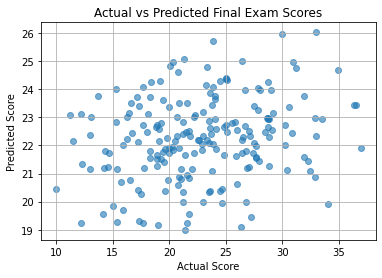

In [33]:
#Predict final exam score (Regression Analysis)

#Features and target
X=df.drop(columns=["Student_ID","Final_Exam_Score", "Pass_Fail"])
y=df["Final_Exam_Score"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train model
reg_model=LinearRegression()
reg_model.fit(X_train, y_train)

#Predicting and evaluating
y_pred = reg_model.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

#Plot actual vs predicted 
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Final Exam Scores")
plt.grid(True)
plt.show()

In [34]:
#Classify Pass/Fail (Logistic Regression)
# Target is Pass_Fail
y_class = df['Pass_Fail']

# Train-test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42, stratify=y_class)

# Train classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_c, y_train_c)

# Predict and evaluate
y_pred_c = clf.predict(X_test_c)
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print(confusion_matrix(y_test_c, y_pred_c))
print(classification_report(y_test_c, y_pred_c))

Accuracy: 0.665
[[  8  57]
 [ 10 125]]
              precision    recall  f1-score   support

           0       0.44      0.12      0.19        65
           1       0.69      0.93      0.79       135

    accuracy                           0.67       200
   macro avg       0.57      0.52      0.49       200
weighted avg       0.61      0.67      0.59       200



In [ ]:
#EVALUATION:
#True Negatives (TN) = 8 (correctly predicted Fail)

#False Positives (FP) = 57 (predicted Pass but actually Fail)

#False Negatives (FN) = 10 (predicted Fail but actually Pass)

#True Positives (TP) = 125 (correctly predicted Pass)

#OBSERVATION: 
#Class 0 (Fail) has poor performance: only 8/65 correctly identified.

#The model is biased toward predicting "Pass", possibly due to class imbalance or weak features for detecting failures.

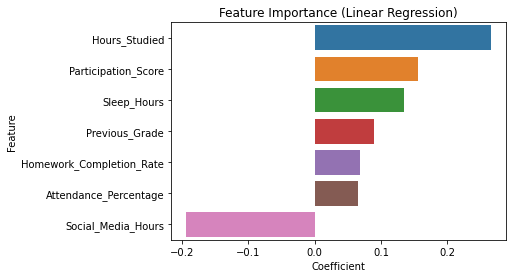

In [35]:
# Show coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': reg_model.coef_
}).sort_values(by='Coefficient', ascending=False)

sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title("Feature Importance (Linear Regression)")
plt.show()

In [36]:
df['Pass_Fail'].value_counts(normalize=True)

1    0.673
0    0.327
Name: Pass_Fail, dtype: float64